In [7]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [8]:
wine = load_wine()
wine.data.shape

(178, 13)

In [9]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [10]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [12]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [13]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [51]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=10,
                                  splitter="random")
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.9074074074074074

## 可视化

In [52]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

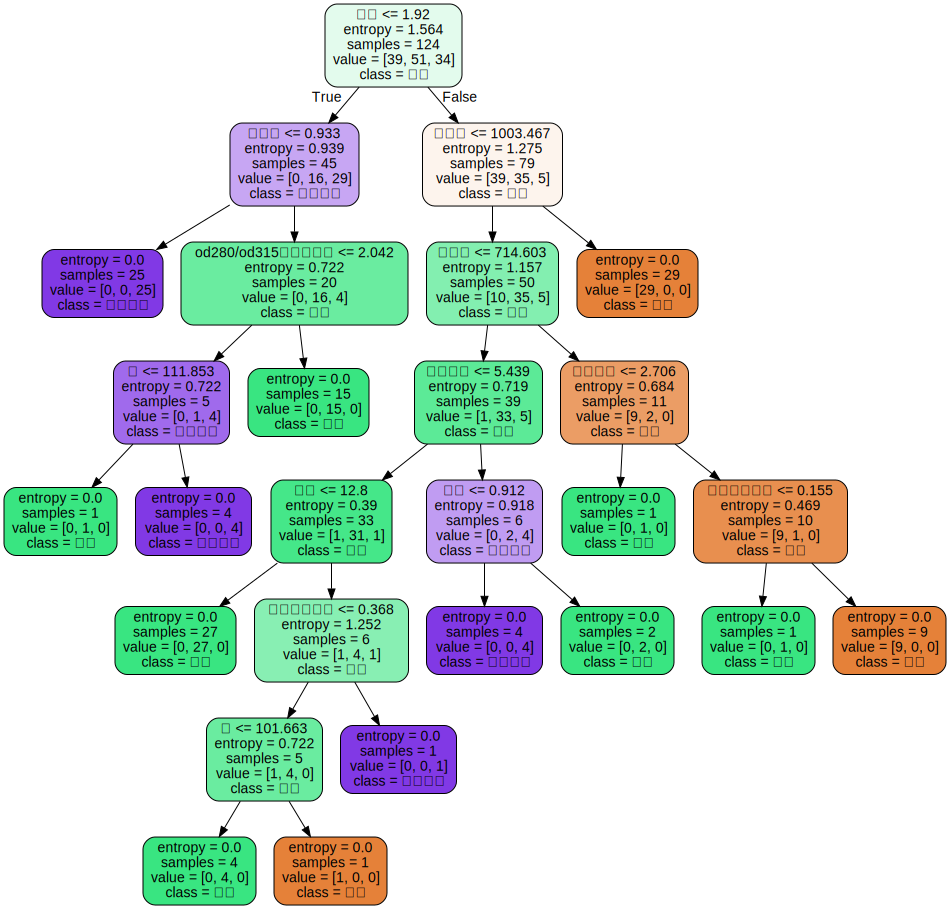

In [53]:
import graphviz
dot_data = tree.export_graphviz(clf,
                               feature_names = feature_name,
                               class_names=["琴酒","雪莉","贝尔摩德"],
                               filled=True,
                               rounded=True)
graph = graphviz.Source(dot_data)
graph

In [54]:
clf.feature_importances_

array([0.02771805, 0.        , 0.        , 0.        , 0.03722771,
       0.26266633, 0.14342543, 0.04429657, 0.        , 0.06443723,
       0.02841229, 0.05584157, 0.33597481])

In [55]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.02771804654978142),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.037227712696650594),
 ('总酚', 0.26266633145733065),
 ('类黄酮', 0.14342542895507832),
 ('非黄烷类酚类', 0.04429657498622482),
 ('花青素', 0.0),
 ('颜色强度', 0.06443723268081633),
 ('色调', 0.02841229235112023),
 ('od280/od315稀释葡萄酒', 0.05584156904497589),
 ('脯氨酸', 0.3359748112780217)]

## 剪枝参数

In [56]:
score_train = clf.score(Xtrain,Ytrain)
score_train

1.0

max_depth 限制树的最大深度

min_samples_leaf 分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本
min_samples_split 一个节点必须要包含至少min_samples_split个训练样本

max_features  限制考虑的特征个数
min_impurity_decrease 限制信息增益的大小

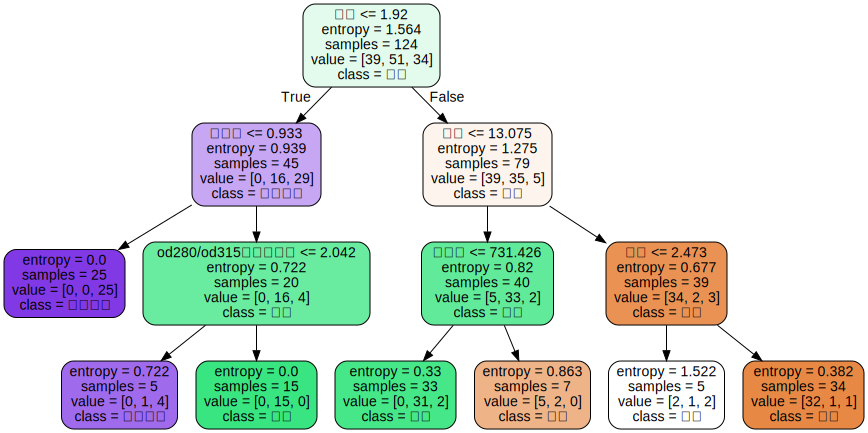

In [62]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=10,
                                  splitter="random",
                                 max_depth=3,
                                 min_samples_leaf=5)
clf = clf.fit(Xtrain,Ytrain)
dot_data = tree.export_graphviz(clf,
                               feature_names = feature_name,
                               class_names=["琴酒","雪莉","贝尔摩德"],
                               filled=True,
                               rounded=True)
graph1 = graphviz.Source(dot_data)
graph1

In [63]:
score = clf.score(Xtrain,Ytrain)
score

0.9193548387096774

#  确认最优的剪枝参数

##  使用确定超参数的曲线来确定

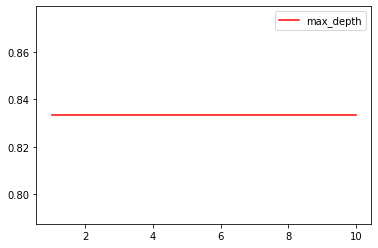

In [68]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=3,
                                     random_state=10,
                                     splitter="random",
                                     criterion="entropy",
                                     min_samples_leaf=5)
    clf = clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)
    test.append(score)
plt.plot(range(1,11),test,color='r',label='max_depth')
plt.legend()
plt.show()

##  目标权重参数

class_weight 完成样本标签平衡的参数

min_weight_fraction_leaf 比不知道样本权重的标准(如min_samples_leaf)更偏向于主导类

## 重要属性和接口

In [69]:
#apply返回每个测试样本所在叶子结点的索引
clf.apply(Xtest)

#predict返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2,
       1, 0, 1, 2, 0, 0, 2, 1, 2, 1])

#   回归树

criterion  衡量分枝质量的指标 "mse"为均方误差 "friedman_mse"费尔德曼均方误差,"mae"绝对平         均误差

In [72]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)#实例化
cross_val_score(regressor,boston.data,boston.target,cv=10,scoring="neg_mean_squared_error")#交叉验证

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])

In [71]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## 回归树拟合正弦曲线

In [74]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [76]:
rng = np.random.RandomState(1)
x = np.sort(5*rng.rand(80,1),axis=0)
y = np.sin(x).ravel()
y[::5] += 3*(0.5 - rng.rand(16))#添加噪声

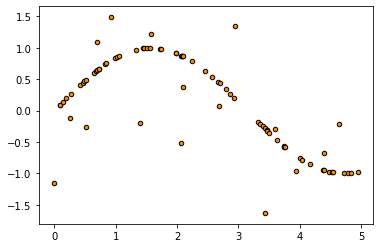

In [77]:
plt.figure()
plt.scatter(x,y,s=20,edgecolor='black',c='darkorange',label='data')

In [78]:
regr1 = DecisionTreeRegressor(max_depth=2)
regr2 = DecisionTreeRegressor(max_depth=5)
regr1.fit(x,y)
regr2.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [79]:
X_test = np.arange(0.0,5.0,0.01)[:,np.newaxis] #np.newaxis  增维 

In [80]:
y1 = regr1.predict(X_test)
y2 = regr2.predict(X_test)

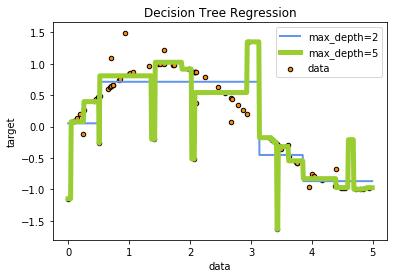

In [83]:
plt.figure()
plt.scatter(x,y,s=20,edgecolor='black',c='darkorange',label='data')
plt.plot(X_test,y1,color='cornflowerblue',label='max_depth=2',linewidth=2)
plt.plot(X_test,y2,color='yellowgreen',label='max_depth=5',linewidth=5)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

###  由图像可知，深度为5的回归树发生了过拟合，深度为2的回归树效果较好